# Modele generatywne w AI (LAB 1)

##  <font color="red">Zasady zaliczenia</font>

- **Aktywność** – na każdych zajęciach będą udostępniane pliki Jupyter Notebook zawierające zadania do wykonania.  
  Zadania niezrobione w trakcie zajęć stają się pracą domową.  
  Każde poprawnie rozwiązane zadanie = *1 punkt* (ostateczna liczba punktów zostanie przeskalowana do **maks. 40 punktów** = $40\cdot\frac{liczba\_zgromadzonych\_punktów}{liczba\_zadań}$).

- **Kolokwia** – przewidziane są **2 kolokwia**, każde maksymalnie na **15 punktów** (łącznie 30 punktów).

- **Projekt indywidualny** – oddawany w połowie semestru, maksymalnie **40 punktów**.

Ocena końcowa będzie wystawiana na podstawie sumy punktów z powyższych składowych:  

$$
\text{Suma} = \text{aktywność} + \text{kolokwia} + \text{projekt}
$$

### Skala ocen

| Ocena | Zakres punktów |
|:-----:|:---------------:|
| bdb   | [90, 110]       |
| db+   | [80, 90)        |
| db    | [70, 80)        |
| dst+  | [60, 70)        |
| dst   | [50, 60)        |
| NZAL  | [0, 50)         |

**Ćwiczenia są obowiązkowe.**  
Dopuszczalne są maksymalnie **2 nieusprawiedliwione nieobecności**.

---

### Instalacja środowiska

Zainstaluj środowisko Python korzystając z jednego z poniższych linku:

- [python.org](https://www.python.org)
- [Anaconda](https://www.anaconda.com/products/individual) (**zalecane**)
- [Miniconda](https://docs.conda.io/en/latest/miniconda.html)

---

### Edytory

Do pisania skryptów wystarczy zwykły notatnik, jednak specjalne edytory znacznie ułatwiają pracę dzięki podpowiadaniu składni.

Polecane edytory:

- **Idle** (instalowany wraz z Pythonem)
- [PyCharm](https://www.jetbrains.com/pycharm/download)
- [Spyder](https://www.spyder-ide.org)
- [Jupyter Notebook](https://jupyter.org) (**będziemy używać na zajęciach**)
- [Eclipse](https://www.eclipse.org) z dodatkiem [PyDev](https://www.pydev.org)

---


### **Zad 1**
Zaimplementuj klasę LCG, która realizuje liniowy generator kongruencyjny:
$$
X_{n+1} = (a\cdot X_n + b)\; mod\ m
$$

Metody, które powinna mieć klasa:
- *seed(s)* — ustawia ziarno,
- *next()* — zwraca następny stan $X_n$ (liczbę całkowitą w $[0, m)$),
- *random()* — zwraca liczbę losową w przedziale [0, 1) (tj. $X_n / m$),
- *randint(low, high)* — zwraca całkowitą z przedziału $[low, high]$ (włącznie).

Następnie wygeneruj $N = 100000$ liczb w $[0,1)$ przy użyciu swojego *LCG* i oblicz średnią oraz wariancję próbkową.

In [ ]:
class LCG:
    """
    Linear Congruential Generator (LCG):
        X_{n+1} = (a * X_n + c) % m
    Provides:
        - seed(s): set initial state
        - next(): return next integer state in [0, m)
        - random(): return float in [0,1)
        - randint(low, high): integer in [low, high] inclusive
    """
    def __init__(self, seed=1, a=1664525, b=1013904223, m=2**32):
        ...

    def seed(self, s):
        """Set the RNG seed (state)."""
        ...

    def next(self):
        """Advance and return the next raw integer random number in [0, m)."""
        ...

    def random(self):
        """Return a float in [0,1)."""
        ...

    def randint(self, low, high):
        """Return integer in [low, high], inclusive."""
        ...



lcg = LCG(seed=123)

N = 100000
s = 0.0
s2 = 0.0
for _ in range(N):
    x = lcg.random()
    s += x
    s2 += x * x
mean = s / N
var = (s2 / N) - mean * mean

print("Sample mean:", mean)
print("Sample variance:", var)
print("Expected mean: 0.5, expected variance: 1/12 =", 1/12)

### **Zad 2**
Wygeneruj próby rozmiaru N = 100000 (możesz zmienić) z następujących jednowymiarowych rozkładów:
- jednostajny na $[0, 1)$,
- normalny $N(\mu=0,\sigma^2=1)$,
- wykładniczy z parametrem $\lambda=1.5$,
- beta z parametrami $\alpha=2$, $\beta=5$,
- gamma z parametrami $k=2$ i $\theta=2$.

Użyj [numpy.random](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator) lub [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) do generowania większości rozkładów. Dla każdego rozkładu narysuj:
 - estymowaną gęstość (histogram z *density=True* oraz wykres funkcyjny gęstości teoretycznej tam, gdzie jest znana),
 - empiryczną dystrybuantę oraz teoretyczną dystrybuantę na tym samym wykresie.
Oblicz i wypisz (dla każdej próbki) empiryczną średnią i wariancję oraz porównaj je z wartościami teoretycznymi (podaj wartości teoretyczne).

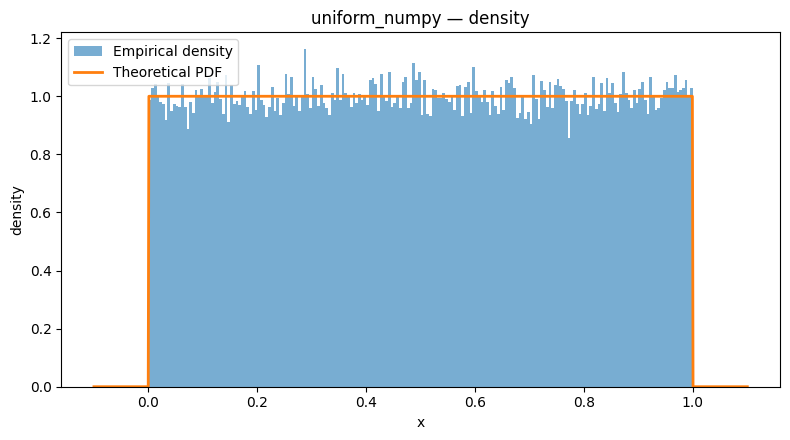

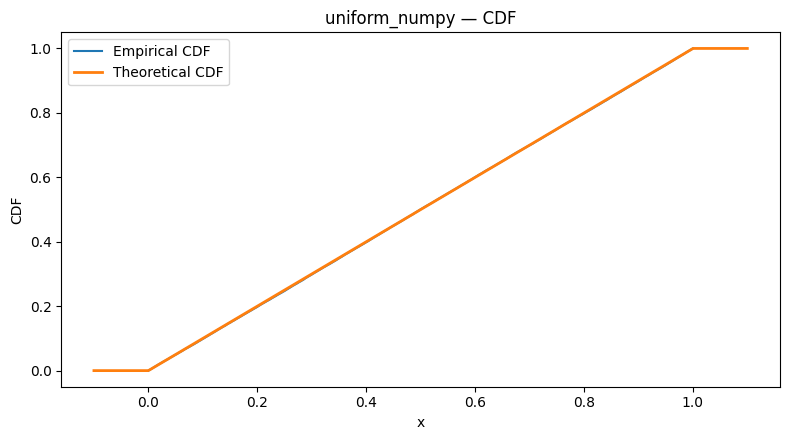

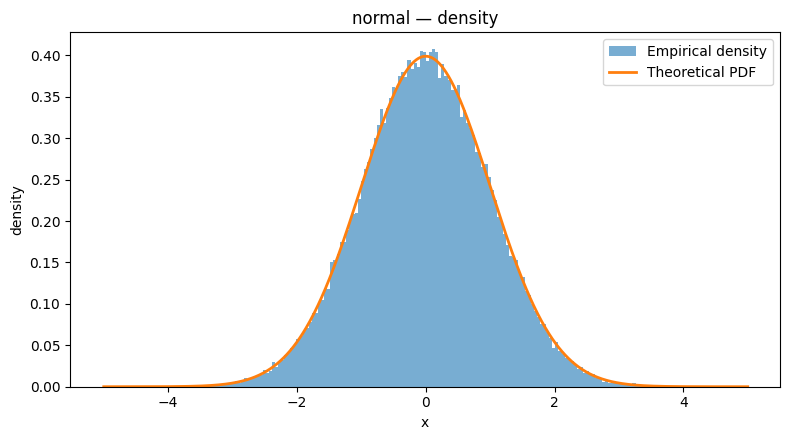

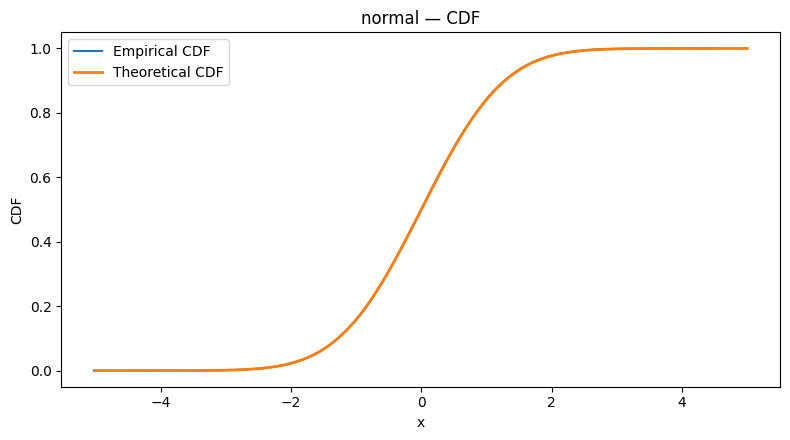

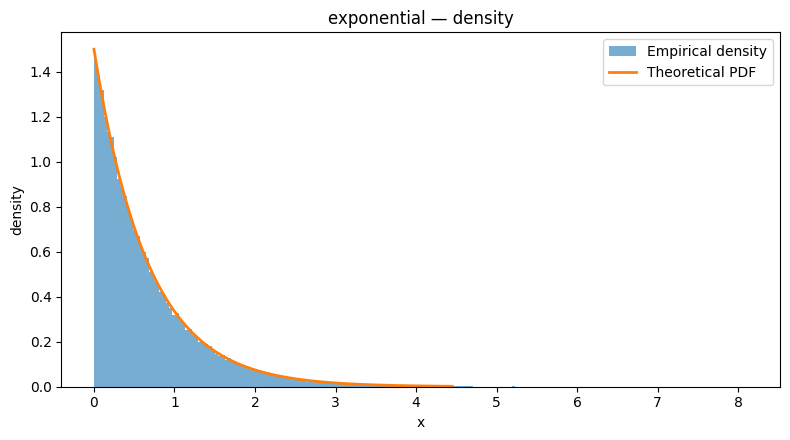

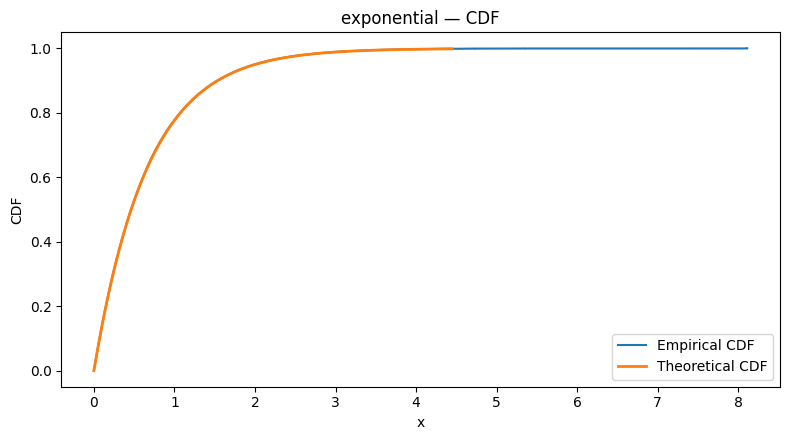

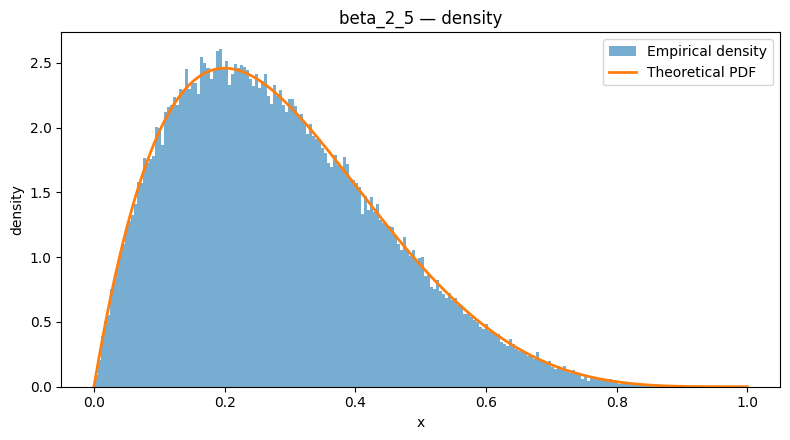

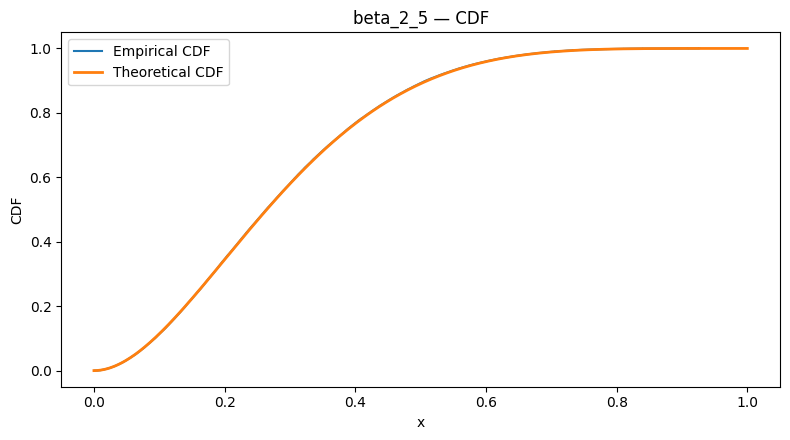

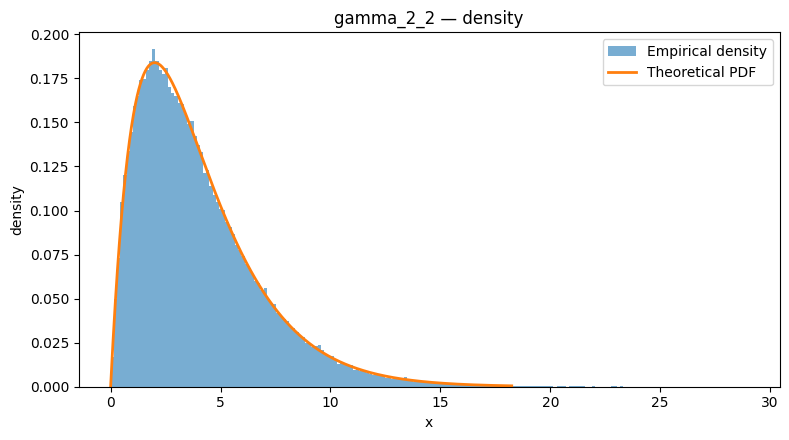

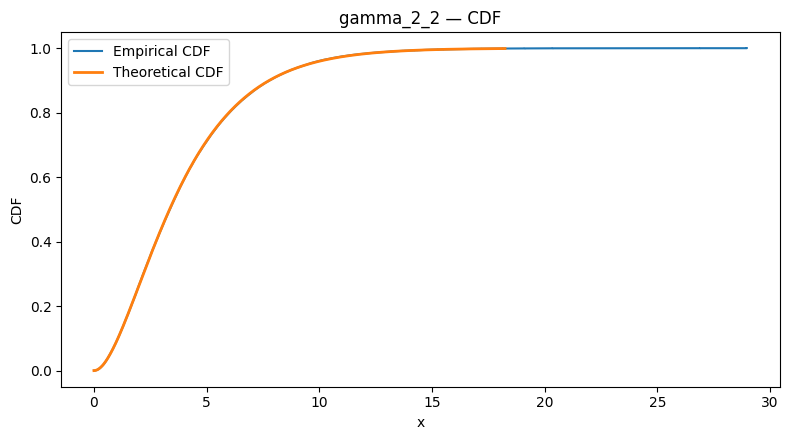

uniform_numpy: empirical mean = 0.500963, empirical var = 0.083265
    theoretical mean = 0.500000
    theoretical var  = 0.083333

normal: empirical mean = -0.003527, empirical var = 0.994247
    theoretical mean = 0.000000
    theoretical var  = 1.000000

exponential: empirical mean = 0.663825, empirical var = 0.438997
    theoretical mean = 0.666667
    theoretical var  = 0.444444

beta(2,5): empirical mean = 0.285185, empirical var = 0.025304
    theoretical mean = 0.285714
    theoretical var  = 0.025510

gamma(k=2,theta=2): empirical mean = 4.004878, empirical var = 7.988186
    theoretical mean = 4.000000
    theoretical var  = 8.000000



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as st


np.random.seed(2025)

N = 100_000

def ecdf(data):
    """Compute empirical CDF points (x, y)."""
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

def plot_density_and_cdf(samples, name, pdf=None, cdf=None, x_support=None, bins=200):
    """
    Plot histogram density + theoretical PDF (if given),
    and ECDF + theoretical CDF (if given).
    Save both plots to PNG files prefixed by 'name'.
    """
    x_min = np.min(samples)
    x_max = np.max(samples)
    if x_support is None:
        # choose a support slightly expanded around data
        span = x_max - x_min
        x_support = np.linspace(x_min - 0.1*span, x_max + 0.1*span, 1000)

    # Density plot
    plt.figure(figsize=(8, 4.5))
    plt.hist(samples, bins=bins, density=True, alpha=0.6, label="Empirical density")
    if pdf is not None:
        plt.plot(x_support, pdf(x_support), label="Theoretical PDF", linewidth=2)
    plt.title(f"{name} — density")
    plt.xlabel("x")
    plt.ylabel("density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ECDF plot
    xs, ys = ecdf(samples)
    plt.figure(figsize=(8, 4.5))
    plt.step(xs, ys, where='post', label="Empirical CDF")
    if cdf is not None:
        plt.plot(x_support, cdf(x_support), label="Theoretical CDF", linewidth=2)
    plt.title(f"{name} — CDF")
    plt.xlabel("x")
    plt.ylabel("CDF")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 1) Uniform [0,1) using numpy and python random for comparison
u_np = np.random.uniform(0.0, 1.0, size=N)

# Theoretical PDF/CDF for uniform(0,1)
def uniform_pdf(x):
  ...

def uniform_cdf(x):
  ...

plot_density_and_cdf(u_np, "uniform_numpy", pdf=uniform_pdf, cdf=uniform_cdf, x_support=np.linspace(-0.1, 1.1, 1000))


# 2) Standard normal N(0,1)
normal = np.random.normal(loc=0.0, scale=1.0, size=N)

def normal_pdf(x):
  ...
def normal_cdf():
  ...

plot_density_and_cdf(normal, "normal", pdf=normal_pdf, cdf=normal_cdf, x_support=np.linspace(-5, 5, 1000))

# 3) Exponential with lambda = 1.5 -> scale = 1/lambda
lam = 1.5
expo = np.random.exponential(scale=1/lam, size=N)
def expo_pdf(x):
  ...
def expo_cdf(x):
  ...
plot_density_and_cdf(expo, "exponential", pdf=expo_pdf, cdf=expo_cdf, x_support=np.linspace(0, np.percentile(expo, 99.9), 1000))

# 4) Beta(alpha=2, beta=5)
a, b = 2.0, 5.0
beta_samples = np.random.beta(a, b, size=N)
def beta_pdf(x):
  ...
def beta_cdf(x):
  ...
plot_density_and_cdf(beta_samples, "beta_2_5", pdf=beta_pdf, cdf=beta_cdf, x_support=np.linspace(0, 1, 1000))

# 5) Gamma (shape k=2.0, scale theta=2.0)
k, theta = 2.0, 2.0
gamma_samples = np.random.gamma(shape=k, scale=theta, size=N)
def gamma_pdf(x):
   ...
def gamma_cdf(x):
   ...
plot_density_and_cdf(gamma_samples, "gamma_2_2", pdf=gamma_pdf, cdf=gamma_cdf, x_support=np.linspace(0, np.percentile(gamma_samples, 99.9), 1000))

# 3) Empirical mean/variance vs theoretical
def summarize(samples, name, theoretical_mean=None, theoretical_var=None):
    mean = np.mean(samples)
    var = np.var(samples, ddof=0)  # population variance
    print(f"{name}: empirical mean = {mean:.6f}, empirical var = {var:.6f}")
    if theoretical_mean is not None:
        print(f"    theoretical mean = {theoretical_mean:.6f}")
    if theoretical_var is not None:
        print(f"    theoretical var  = {theoretical_var:.6f}")
    print()

# Theoretical values:
# uniform(0,1): mean=0.5, var=1/12
summarize(u_np, "uniform_numpy", theoretical_mean=0.5, theoretical_var=1.0/12.0)

# normal(0,1): mean=0, var=1
summarize(normal, "normal", theoretical_mean=0.0, theoretical_var=1.0)

# exponential lambda -> mean=1/lambda, var=1/lambda^2
summarize(expo, "exponential", theoretical_mean=1/lam, theoretical_var=1/(lam**2))

# beta(a,b): mean = a/(a+b), var = a*b/[(a+b)^2 (a+b+1)]
beta_mean = a / (a + b)
beta_var = a * b / ((a + b)**2 * (a + b + 1))
summarize(beta_samples, "beta(2,5)", theoretical_mean=beta_mean, theoretical_var=beta_var)

# gamma(k,theta): mean = k*theta, var = k*theta^2
gamma_mean = k * theta
gamma_var = k * theta**2
summarize(gamma_samples, "gamma(k=2,theta=2)", theoretical_mean=gamma_mean, theoretical_var=gamma_var)

### **Zad 3**
Wygeneruj dwie niezależne zmienne losowe $U_1, U_2\sim Unif(0,1)$. Użyj zarówno *random.random()* (moduł standardowy) jak i *numpy.random.uniform()* (porównaj). Zastosuj transformację *Boxa–Mullera*, aby otrzymać dwie niezależne zmienne normalne standardowe $Z_1$, $Z_2$. Wygeneruj $N=100000$ par i zweryfikuj jakość generowania:
- narysuj histogram (gęstość) dla $Z_0$ wraz z teoretycznym PDF $\phi(x) = \frac{1}{\sqrt{2\pi}}\,\exp\left(-\frac{x^2}{2}\right)$,
- narysuj empiryczną dystrybuantę i porównaj z teoretyczną CDF,
- policz empiryczną średnią i wariancę (powinny być bliskie 0 i 1).

Box-Muller (numpy) Z0: mean = 0.005125573815477541 var = 0.9912652925985888
Box-Muller (numpy) Z1: mean = 0.0026327165057819313 var = 1.0017078753229207


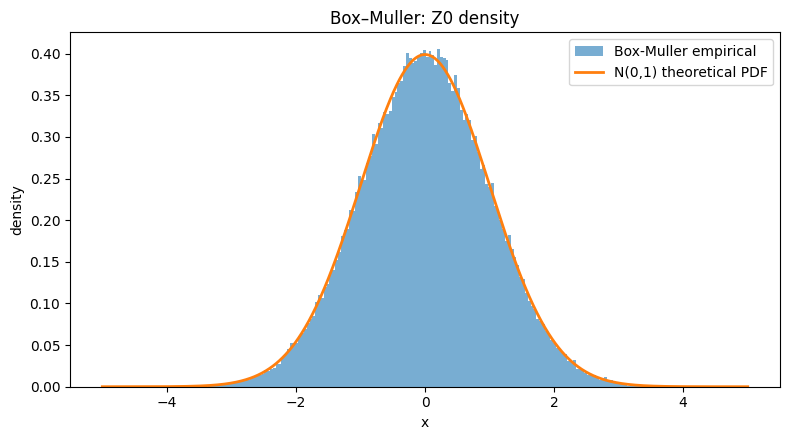

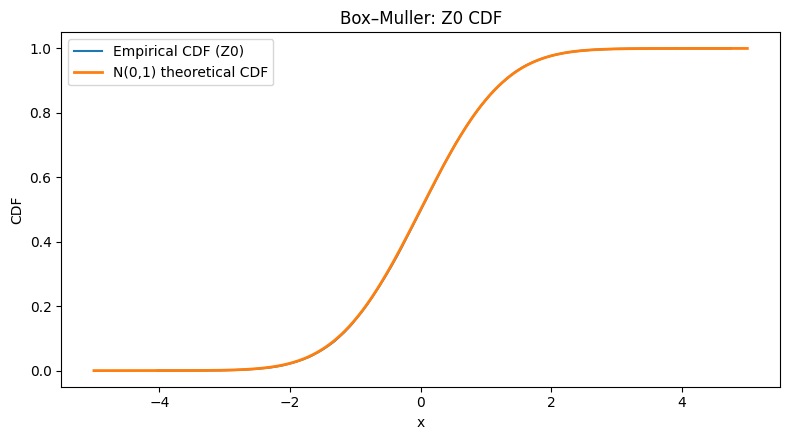

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st

np.random.seed(2025)
random.seed(2025)

N = 100_000

# 1) Generate U1, U2 using numpy
u1 = ...
u2 = ...

# 2) Box-Muller transform (vectorized)
r = ...
theta = ...
z0 = ...
z1 = ...

# Quick statistics
print("Box-Muller (numpy) Z0: mean =", np.mean(z0), "var =", np.var(z0))
print("Box-Muller (numpy) Z1: mean =", np.mean(z1), "var =", np.var(z1))

# 3) Plots: histogram + theoretical normal pdf, and empirical CDF vs theoretical CDF
x_support = np.linspace(-5, 5, 1000)
def pdf_norm(x):
    ...
def cdf_norm(x):
    ...

# density
plt.figure(figsize=(8,4.5))
plt.hist(z0, bins=200, density=True, alpha=0.6, label="Box-Muller empirical")
plt.plot(x_support, pdf_norm(x_support), linewidth=2, label="N(0,1) theoretical PDF")
plt.title("Box–Muller: Z0 density")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

# ECDF
xs = np.sort(z0)
ys = np.arange(1, N+1) / N
plt.figure(figsize=(8,4.5))
plt.step(xs, ys, where='post', label="Empirical CDF (Z0)")
plt.plot(x_support, cdf_norm(x_support), linewidth=2, label="N(0,1) theoretical CDF")
plt.title("Box–Muller: Z0 CDF")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.tight_layout()
plt.show()

### **Zad 4**
Wygeneruj 10000 próbek z dwuwymiarowego rozkładu normalnego o zadanych parametrach:
   - wektor średnich:  
     $$
     \mu = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
     $$
   - macierz kowariancji:  
     $$
     \Sigma = \begin{bmatrix} 1 & 0.8 \\ 0.8 & 1 \end{bmatrix}
     $$

Następnie, narysuj:
   - wykres punktowy próbek w układzie współrzędnych,
   - izolinie gęstości rozkładu ([kontury](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)).

Oblicz średnią oraz macierz kowariancji na podstawie wygenerowanej próby i porównaj je z $\mu$, $\Sigma$. Skorzystaj z *numpy.mean* oraz *numpy.cov* oraz zaimplementuj sam (bez użycia bibliotek).

Mean: [0.97719973 1.96649918]
Macierz kowariancji z próby:
 [[1.03606702 0.84255778]
 [0.84255778 1.03374829]]


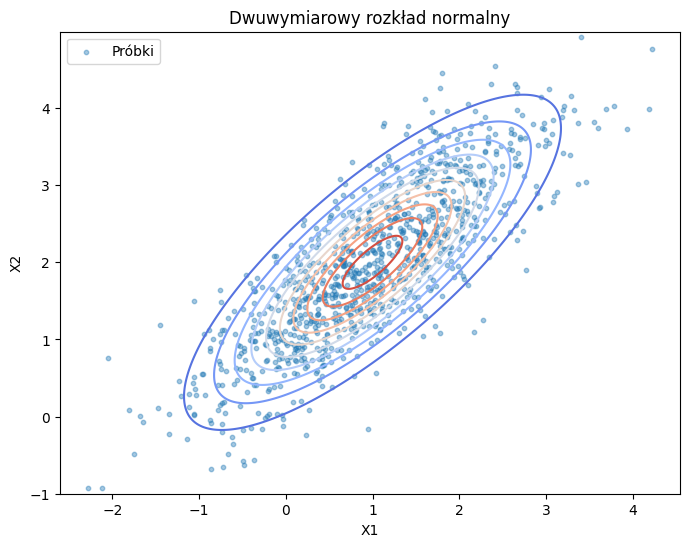

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ??

# Parametry rozkładu
mu = np.array([1, 2])
sigma = np.array([[1, 0.8],
                  [0.8, 1]])

# Generowanie próbek
samples = ...

print("Mean:", np.mean(samples, axis=0))

# Obliczenie macierzy kowariancji z próby
empirical_cov = np.cov(samples, rowvar=False)
print("Macierz kowariancji z próby:\n", empirical_cov)

# Wykres punktowy
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], s=10, alpha=0.4, label="Próbki")

# Siatka do narysowania gęstości
x, y = np.mgrid[-2:4:.01, -1:5:.01]
pos = np.dstack((x, y))
rv = ...
plt.contour(x, y, rv.pdf(pos), levels=10, cmap="coolwarm")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dwuwymiarowy rozkład normalny")
plt.legend()
plt.show()


### **Zad 5**
Wygeneruj próbki losowe w przestrzeni trójwymiarowej ($\mathbb{R}^3$) w dwóch przypadkach:
   - punkty **równomiernie rozmieszczone w kuli jednostkowej** $B(0,1) = \{ x \in \mathbb{R}^3 : \|x\| \leq 1 \}$,
   - punkty **równomiernie rozmieszczone na powierzchni sfery jednostkowej** $S(0,1) = \{ x \in \mathbb{R}^3 : \|x\| = 1 \}$.

Dodatkowo, narysuj:
   - wykres 3D próbek z kuli,
   - wykres 3D próbek ze sfery.

Sprawdź rozkład odległości punktów od środka w przypadku próbkowania z kuli (powinien odpowiadać gęstości $3r^2$).

##  <font color="red">Należy uzyskać wizualizacje podobne do tych w folderze results</font>

In [ ]:
import tkinter
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

def sample_ball(n_samples=1000, dim=3):
    ...


def sample_sphere(n_samples=1000, dim=3):
    ...

# Generowanie próbek
points_ball = sample_ball(2000, 3)
points_sphere = sample_sphere(2000, 3)

# --- Wykres 3D kuli ---
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(..., ..., ..., s=5, alpha=0.5)
ax1.set_title("Próbki z kuli jednostkowej")

# --- Wykres 3D sfery ---
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(..., ..., ..., s=5, alpha=0.5)
ax2.set_title("Próbki z sfery jednostkowej")

plt.show()

# --- Histogram promieni dla kuli ---
radii = np.linalg.norm(points_ball, axis=1)
# Histogram znormalizowany (estymacja gęstości)
counts, bins, _ = plt.hist(radii, bins=50, density=True, alpha=0.6, label="Histogram próbek")

# Teoretyczna gęstość: f(r) = 3r^2 dla r ∈ [0,1]
r = np.linspace(0, 1, 200)
f_r = 3 * r**2
plt.plot(r, f_r, 'r-', lw=2, label="Teoretyczna gęstość $3r^2$")

plt.xlabel("r")
plt.ylabel("Gęstość")
plt.title("Rozkład promieni w kuli jednostkowej (3D)")
plt.legend()
plt.show()
